In [1]:
import Models
import numpy as np
import random as rn
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

rn.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
tf.config.threading.set_inter_op_parallelism_threads(1)
tf.config.threading.set_intra_op_parallelism_threads(1)

# Load Data
X_renal_data = pd.read_csv('./x_exp_renal.csv', sep='\t') # Dataset has Donor ID as first column
y_renal_data = pd.read_csv('./y_renal.csv', sep=',') # Dataset has Donor ID on first column and Label on second column.

X_train_norm, X_train_swapped, X_test_norm, y_train, y_test, y_train_oh, y_test_oh, X_train_first, X_train_second, X_swapped_first, X_swapped_second, X_test_first, X_test_second \
    = Models.prepare_datasets(X_renal_data.iloc[:,1:],y_renal_data["label"], test_size=0.2, swap_noise=0.15)


swapping: 65 rows.


In [27]:
X_renal_data.head()

,icgc_donor_id,?,A1BG,A1CF,A2BP1,A2LD1,A2M,A2ML1,A4GALT,A4GNT,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
0,DO16109,-0.467510,-0.226280,1.151872,-0.075902,0.778519,0.001395,-0.101557,-0.439240,4.704873,...,0.727789,0.120243,0.628775,2.576546,0.123048,-0.721112,0.454836,0.186805,-0.679857,0.120435
1,DO16110,-0.786589,-0.246766,-0.043498,-0.069505,-0.350242,0.623101,-0.101557,-0.303614,-0.341284,...,0.165109,0.127965,0.795990,-0.616360,0.129794,0.146724,0.716990,0.359880,-0.687802,-0.147521
2,DO16111,-0.756899,-0.307248,1.359452,-0.078295,-0.407898,-0.276054,-0.101557,-0.064217,-0.074531,...,0.606017,0.268630,-0.335303,1.315702,-0.004250,-1.209205,-0.494033,-0.121277,-0.556871,-0.147521
3,DO16113,-0.630074,-0.177178,0.706404,-0.078295,-0.337470,0.117215,-0.064826,-0.468127,0.925708,...,0.797566,0.448625,0.626955,0.624348,-0.108634,-0.614859,0.777219,-0.013074,-0.675505,-0.147521
4,DO16115,0.888361,-0.105994,0.657141,0.150858,2.765686,0.578676,-0.088106,0.121378,-0.201964,...,0.457409,1.157591,1.719020,1.704164,1.084416,0.820860,1.325434,1.236782,1.177049,-0.147521


In [24]:
import importlib
importlib.reload(Models)

<module 'Models' from 'C:\\Desarrollo\\Data Science\\Jupyter Notebooks\\Stage\\oss-stage-2019\\Singleomic Dataset\\Models.py'>

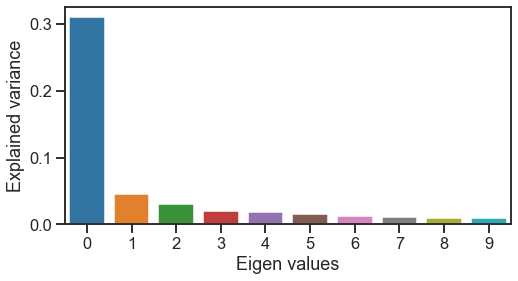

PCA on single-modal explained variance ratio: 0.48103795292302987


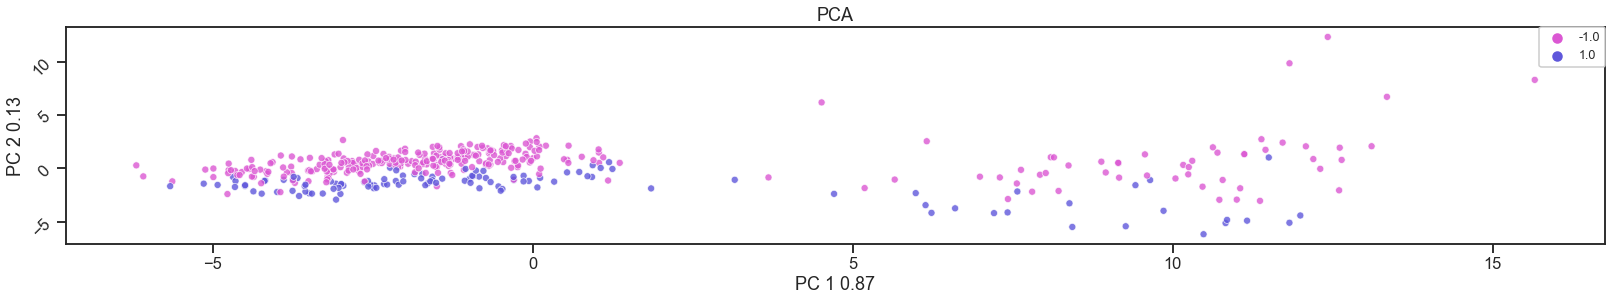

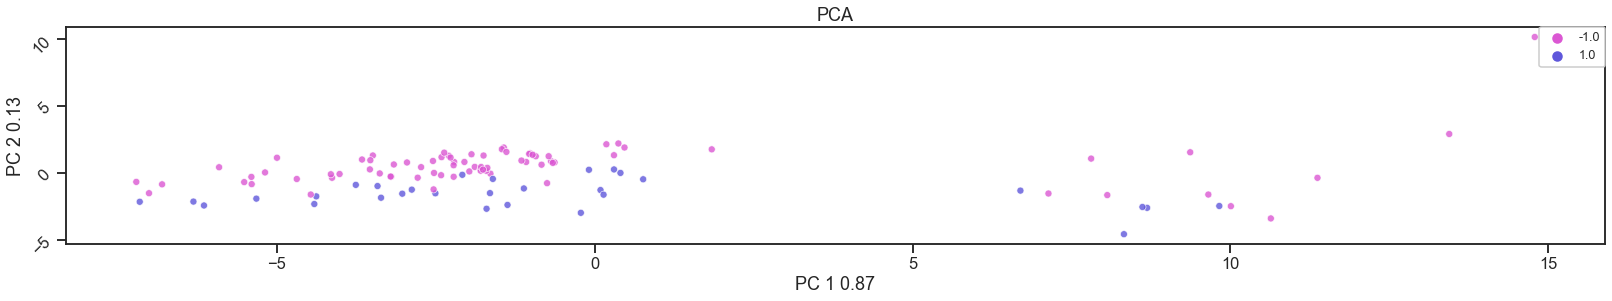

Compression: 102.52
Train on 433 samples
Epoch 1/200
433/433 [==============================] - 2s 4ms/sample - loss: 0.2671 - model_55_loss: 0.1424 - model_55_1_loss: 0.1477 - model_55_mse: 0.1442 - model_55_1_mse: 0.1493
Epoch 2/200
433/433 [==============================] - 1s 2ms/sample - loss: 0.1540 - model_55_loss: 0.0566 - model_55_1_loss: 0.0675 - model_55_mse: 0.0575 - model_55_1_mse: 0.0685
Epoch 3/200
433/433 [==============================] - 1s 2ms/sample - loss: 0.0935 - model_55_loss: 0.0198 - model_55_1_loss: 0.0235 - model_55_mse: 0.0198 - model_55_1_mse: 0.0235
Epoch 4/200
433/433 [==============================] - 1s 2ms/sample - loss: 0.0702 - model_55_loss: 0.0127 - model_55_1_loss: 0.0135 - model_55_mse: 0.0127 - model_55_1_mse: 0.0135
Epoch 5/200
433/433 [==============================] - 1s 2ms/sample - loss: 0.0577 - model_55_loss: 0.0110 - model_55_1_loss: 0.0112 - model_55_mse: 0.0110 - model_55_1_mse: 0.0112
Epoch 6/200
433/433 [============================

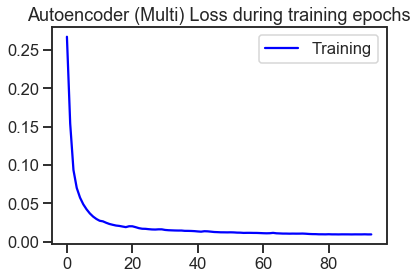

0.009693205334013865


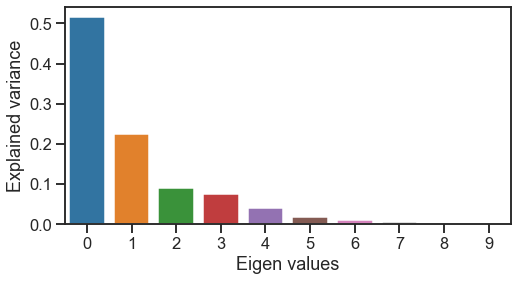

PCA on single-modal explained variance ratio: 0.9878955483436584


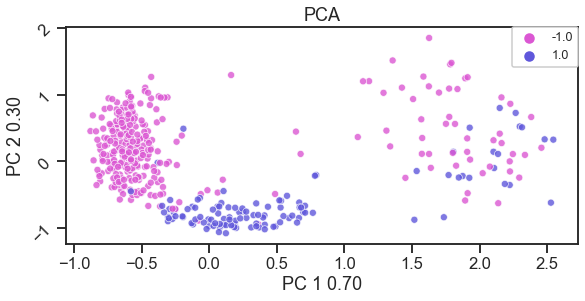

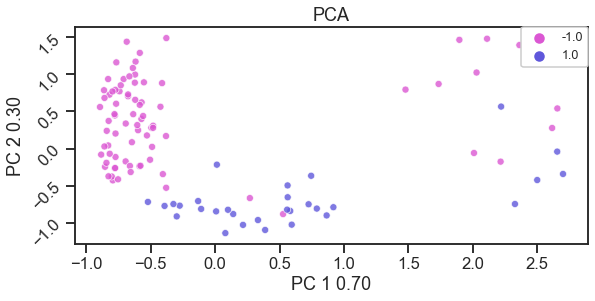

Results for AE: 

Best score for training data: 0.9677626303127507 

Best C: 0.5 



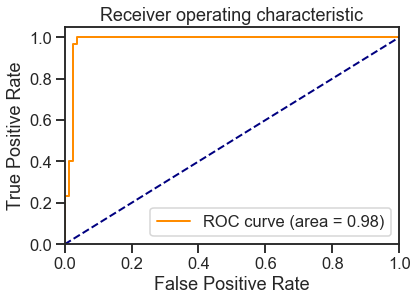

[[76  3]
 [ 1 29]]


              precision    recall  f1-score   support

          -1       0.99      0.96      0.97        79
           1       0.91      0.97      0.94        30

    accuracy                           0.96       109
   macro avg       0.95      0.96      0.95       109
weighted avg       0.96      0.96      0.96       109

Training set score for Logistic Regression: 0.972286
Testing  set score for Logistic Regression: 0.963303
Best score for training data: 0.9699812884255546 

Best C: 0.5 

Best Gamma: 0.1 



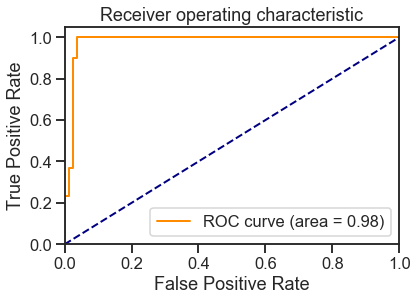

[[76  3]
 [ 3 27]]


              precision    recall  f1-score   support

          -1       0.96      0.96      0.96        79
           1       0.90      0.90      0.90        30

    accuracy                           0.94       109
   macro avg       0.93      0.93      0.93       109
weighted avg       0.94      0.94      0.94       109

Training set score for SVM: 0.969977
Testing  set score for SVM: 0.944954
Best score for training data: 0.970008019246191 

Best #estimators: 90 

Best max depth: 8 



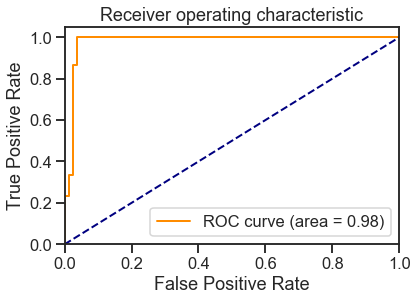

[[76  3]
 [ 3 27]]


              precision    recall  f1-score   support

          -1       0.96      0.96      0.96        79
           1       0.90      0.90      0.90        30

    accuracy                           0.94       109
   macro avg       0.93      0.93      0.93       109
weighted avg       0.94      0.94      0.94       109

Training set score for RFC: 0.995381
Testing  set score for RFC: 0.944954
mutual information: 0.0006652891420821039
AE 2 clusters -  silhoutte score: 0.5411325097084045
AE 3 clusters -  silhoutte score: 0.40575897693634033
AE 4 clusters -  silhoutte score: 0.325063556432724
AE 5 clusters -  silhoutte score: 0.3252823054790497
AE 6 clusters -  silhoutte score: 0.29459092020988464


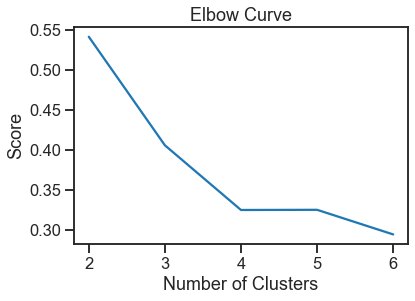

mutual information: 0.0008776597682347498
AE 2 clusters -  silhoutte score: 0.5428353548049927
AE 3 clusters -  silhoutte score: 0.5417407751083374
AE 4 clusters -  silhoutte score: 0.5120499134063721
AE 5 clusters -  silhoutte score: 0.406418114900589
AE 6 clusters -  silhoutte score: 0.49649348855018616


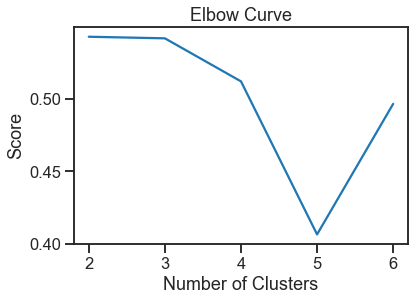

mutual information: 0.00048442643640750696
AE 2 clusters -  silhoutte score: 0.5397646427154541
AE 3 clusters -  silhoutte score: 0.40587085485458374
AE 4 clusters -  silhoutte score: 0.30288463830947876
AE 5 clusters -  silhoutte score: 0.3004893958568573
AE 6 clusters -  silhoutte score: 0.30160093307495117


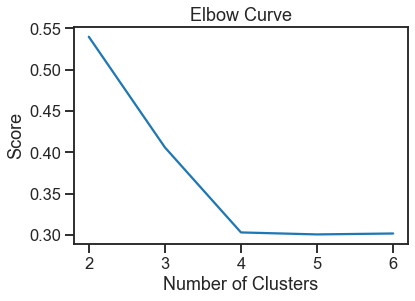

In [25]:
###  Hyperparamter tuning
# MAP y_train from classes -1 and 1 to 0 and 1
y_train_map = ((y_train + 1)/2).astype(int)

### VISUALIZATION WITH PCA
## ORIGINAL DATASET
X_latent_pca, X_latent_test_pca = Models.perform_PCA(X_train_norm, X_test_norm, y_train, y_test, n_components=10)

mus=[0.7]
dropouts = [0.1]
l1s = [0.000005]
l2s = [0.000005]
scores = []
for dropout in dropouts:
    for l1 in l1s:
        for l2 in l2s:
            for mu in mus:
                ## Build and Train Autoencoder
                autoencoder, encoder, decoder, loss = Models.build_and_train_multi_autoencoder([X_swapped_first,X_swapped_second],
                                                                              [X_train_first,X_train_second],
                                                                              encoding_dim=50, 
                                                                              regularizer=tf.keras.regularizers.l1_l2(l1,l2),
                                                                              dropout=dropout,
                                                                              epochs=200,
                                                                              mu=mu)
                ## Encode datasets
                X_latent_multi_dae = Models.encode_dataset([X_train_first,X_train_second], encoder)
                X_latent_test_multi_dae = Models.encode_dataset([X_test_first,X_test_second], encoder)

                ## PCA ON AUTOENCODER LATENT SPACE
                X_latent_pca_multi_dae, X_latent_test_pca_multi_dae = Models.perform_PCA(X_latent_multi_dae, X_latent_test_multi_dae, y_train, y_test, n_components=10)

                ### CLASSIFICATION ###
                classify = Models.classify_with_cv(X_latent_multi_dae, X_latent_test_multi_dae, y_train, y_test, model_type="AE")

                ### CLUSTERING ###
                clustering = Models.cluster(X_latent_multi_dae,y_train_map, model_type="AE")

                scores.append([mu,dropout,l1,l2,loss] + classify + clustering)


In [26]:
scores = pd.DataFrame(scores,
                      columns=["mu","dropout","l1","l2","loss","LR_accuracy","SVM_accuracy", "RF_accuracy", "LR_auc", "SVM_auc", "RF_auc","kmeans_silhouette","kmeans_mutual_info","spectral_silhouette","spectral_mutual_info","hierarchical_silhouette","hierarchical_mutual_info"])    
scores

,mu,dropout,l1,l2,loss,LR_accuracy,SVM_accuracy,RF_accuracy,LR_auc,SVM_auc,RF_auc,kmeans_silhouette,kmeans_mutual_info,spectral_silhouette,spectral_mutual_info,hierarchical_silhouette,hierarchical_mutual_info
0,0.7,0.1,0.000005,0.000005,0.009693,0.963303,0.944954,0.944954,0.982278,0.981013,0.980169,0.541133,0.000665,0.542835,0.000878,0.539765,0.000484


### Results

| dim | mu  | l1      | l2      | Dropout | Loss   | Accuracy (LR) | Accuracy (SVM) | Accuracy (RF) | ROC-AUC (LR) | ROC-AUC (SVM) | ROC-AUC (RF) | SS (K-means) | MI (K-means) | SS (Spectral) | MI (Spectral) | SS (Hierarch.) | MI (Hierarch.) |
|-----|-----|---------|---------|---------|--------|---------------|----------------|---------------|--------------|---------------|--------------|--------------|--------------|---------------|---------------|----------------|----------------|
| 50  | 0.5 | 0.000005| 0.000005| 0.10    | 0.0093 |  0.96         | 0.93           | 0.97          | 0.9814       | 0.9814        | 0.9850       | 0.50         | 0.0004       | 0.51          | 0.0000        | 0.50           | 0.0004         |
| 50  | 0.5 | 0.000005| 0.000001| 0.00    | 0.0106 |  0.96         | 0.96           | 0.94          | 0.9856       | 0.9839        | 0.9873       | 0.41         | 0.4355       | 0.51          | 0.0047        | 0.40           | 0.4112         |
|-----|-----|---------|---------|---------|--------|---------------|----------------|---------------|--------------|---------------|--------------|--------------|--------------|---------------|---------------|----------------|----------------|
| 100 | 0.5 | 0.000005| 0.000001| 0.00    | 0.0087 |  0.95         | 0.94           | 0.98          | 0.9822       | 0.9822        | 0.9824       | 0.55         | 0.0004       | 0.55          | 0.0006        | 0.55           | 0.0004         |
|-----|-----|---------|---------|---------|--------|---------------|----------------|---------------|--------------|---------------|--------------|--------------|--------------|---------------|---------------|----------------|----------------|
| 200 | 0.5 | 0.000005| 0.000001| 0.20    | 0.0101 |  0.96         | 0.95           | 0.97          | 0.9810       | 0.9767        | 0.9852       | 0.55         | 0.0015       | 0.50          | 0.0047        | 0.55           | 0.0004         |
|-----|-----|---------|---------|---------|--------|---------------|----------------|---------------|--------------|---------------|--------------|--------------|--------------|---------------|---------------|----------------|----------------|
| 20  | 0.5 | 0.000005| 0.000005| 0.00    | 0.0120 |  0.93         | 0.92           | 0.94          | 0.9679       | 0.9721        | 0.9706       | 0.43         | 0.4197       | 0.50          | 0.0033        | 0.50           | 0.0003         |
| 20  | 0.5 | 0.000005| 0.000005| 0.10    | 0.0110 |  0.94         | 0.93           | 0.94          | 0.9755       | 0.9780        | 0.9755       | 0.52         | 0.0012       | 0.52          | 0.0012        | 0.52           | 0.0004         |
|-----|-----|---------|---------|---------|--------|---------------|----------------|---------------|--------------|---------------|--------------|--------------|--------------|---------------|---------------|----------------|----------------|
| 50  | 0.5 | 0.000005| 0.000005| 0.10    | 0.0095 |  0.95         | 0.94           | 0.96          | 0.9793       | 0.9793        | 0.9854       | 0.54         | 0.0006       | 0.55          | 0.0047        | 0.54           | 0.0004         |
| 50  | 0.7 | 0.000005| 0.000005| 0.10    | 0.0121 |  0.95         | 0.95           | 0.97          | 0.9797       | 0.9797        | 0.9871       | 0.45         | 0.3095       | 0.51          | 0.0006        | 0.44           | 0.4695         |
|-----|-----|---------|---------|---------|--------|---------------|----------------|---------------|--------------|---------------|--------------|--------------|--------------|---------------|---------------|----------------|----------------|
| 50  | 0.7 | 0.000005| 0.000005| 0.15    | 0.0095 |  0.95         | 0.92           | 0.98          | 0.9810       | 0.9818        | 0.9789       | 0.54         | 0.0008       | 0.53          | 0.0047        | 0.54           | 0.0006         |
| 50  | 0.9 | 0.000005| 0.000005| 0.10    | 0.0115 |  0.94         | 0.95           | 0.96          | 0.9793       | 0.9801        | 0.9793       | 0.51         | 0.0004       | 0.51          | 0.0006        | 0.51           | 0.0003         |
| 50  | 0.9 | 0.000005| 0.000005| 0.15    | 0.0112 |  0.95         | 0.92           | 0.97          | 0.9818       | 0.9831        | 0.9791       | 0.44         | 0.4041       | 0.50          | 0.0008        | 0.44           | 0.4738         |

